In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("../assets/data/fitness_stats.json", "r") as f:
	data = json.load(f)

best = data["best"]
avg = data["avg"]
worst = data["worst"]

generations = np.arange(len(best))

In [3]:
def moving_average(data, window_size=50):
    return [
        sum(data[max(0, i - window_size + 1):i + 1]) / (i - max(0, i - window_size + 1) + 1)
        for i in range(len(data))
    ]

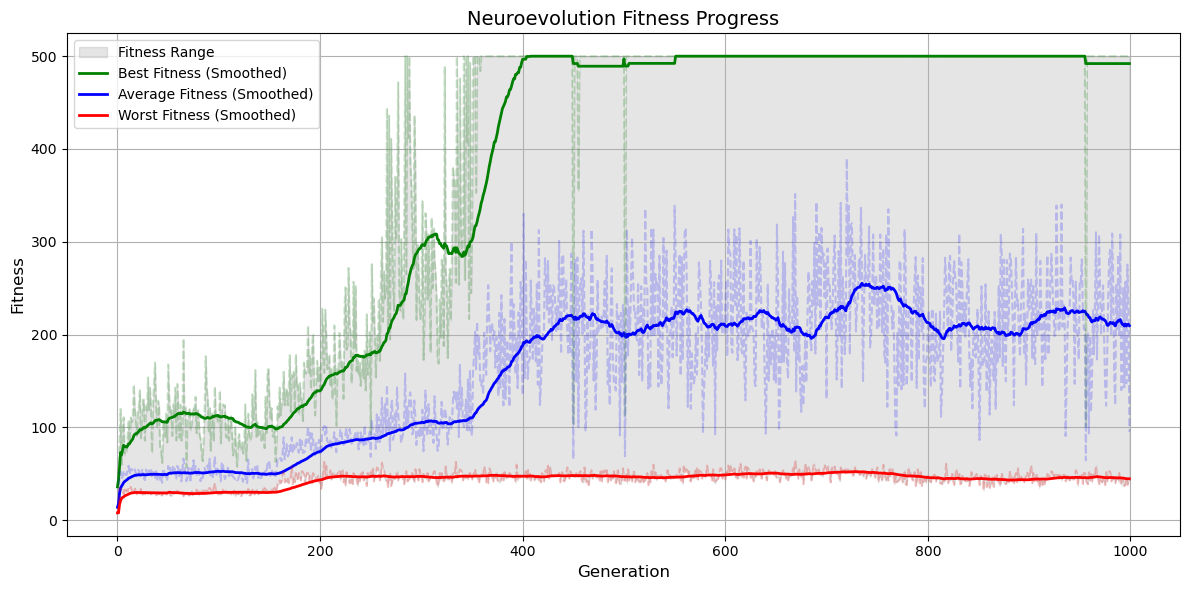

In [ ]:

smooth_best = moving_average(best, window_size=50)
smooth_avg = moving_average(avg, window_size=50)
smooth_worst = moving_average(worst, window_size=50)

fig, ax = plt.subplots(figsize=(12, 6))

ax.fill_between(generations, worst, best, color="gray", alpha=0.2, label="Fitness Range")

ax.plot(generations, smooth_best, label="Best Fitness (Smoothed)", color="green", linewidth=2)
ax.plot(generations, smooth_avg, label="Average Fitness (Smoothed)", color="blue", linewidth=2)
ax.plot(generations, smooth_worst, label="Worst Fitness (Smoothed)", color="red", linewidth=2)

ax.plot(generations, best, color="green", alpha=0.2, linestyle="--")
ax.plot(generations, avg, color="blue", alpha=0.2, linestyle="--")
ax.plot(generations, worst, color="red", alpha=0.2, linestyle="--")

ax.set_xlabel("Generation", fontsize=12)
ax.set_ylabel("Fitness", fontsize=12)
ax.set_title("CartPole Fitness Progress", fontsize=14)
ax.legend(loc="upper left")
ax.grid(True)

plt.tight_layout()
plt.savefig("../assets/figures/smoothed_fitness_plot.png", dpi=300)
plt.show()
